In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

%matplotlib inline

# read dataset
df_train = pd.read_csv("titanic_training.csv")#("titanic_training.csv")
df_test = pd.read_csv("titanic_testing.csv")

In [2]:
def preprocess(df):
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
    df['Name'] = df['Name'].str.len()
    return df

In [3]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

In [4]:
X = df_test.iloc[:, 0:7] # attributes/inputs
y = df_test['Survived'] # output / needs to be predict


Xt = df_test.iloc[:, 0:7] # attributes/inputs
yt = df_test['Survived'] # output / needs to be predict

In [5]:
# build the KMeans Model
kmeans = KMeans(n_clusters=2,random_state=42, n_init='auto', max_iter=100)
clusters = kmeans.fit_predict(X)

from scipy.stats import mode
labels = np.zeros_like(clusters)

for i in range(2):
    cat = (clusters == i)
    labels[cat] = mode(y[cat])[0]

acc = accuracy_score(y, labels)
print('Accuracy = ', acc)

Accuracy =  0.6053811659192825


In [6]:
# General EM for GMM
from sklearn import preprocessing

# transform data so the distribution mean = 0 and std = 1, so preprocessing is needed
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2,covariance_type='diag', random_state=42,init_params='k-means++')
gmm_y = gmm.fit_predict(xs)

labels_gmm = np.zeros_like(clusters)

for i in range(2):
    cat = (gmm_y == i)
    labels_gmm[cat] = mode(y[cat])[0]

acc_gmm = accuracy_score(y, labels_gmm)
print('Accuracy using GMM = ', acc_gmm)

Accuracy using GMM =  0.7668161434977578


Text(0, 0.5, 'Age')

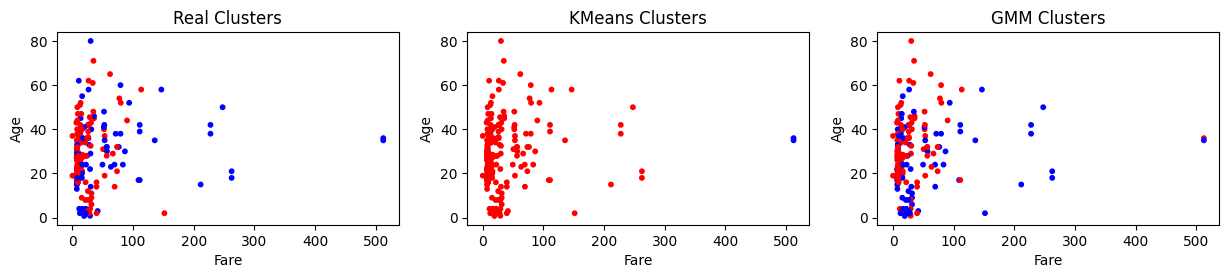

In [7]:
plt.figure(figsize=(15,2.5))
colormap = np.array(['red', 'blue'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Fare, X.Age, c = colormap[y], s=10)
plt.title('Real Clusters')
plt.xlabel('Fare')
plt.ylabel('Age')

#plot Kmeans Model Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Fare, X.Age, c = colormap[labels], s=10)
plt.title('KMeans Clusters')
plt.xlabel('Fare')
plt.ylabel('Age')

plt.subplot(1, 3, 3)
plt.scatter(X.Fare, X.Age, c = colormap[gmm_y], s=10)
plt.title('GMM Clusters')
plt.xlabel('Fare')
plt.ylabel('Age')